# Further Preprocessing and Visualization of the data

In [43]:
# Imports
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
from datetime import datetime
import re
from sklearn.preprocessing import MultiLabelBinarizer

Using the merged dataframe from the intial preprocessing

In [26]:
movies = pd.read_csv('../data/merged_dataset.csv')

In [27]:
movies.shape

(22914, 14)

In [28]:
movies.head(3)

,budget,genres,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,vote_count,keywords,top_cast,director
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,17.015539,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,11.712900,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",Howard Deutch


Since the 'genres' and 'keywords' columns are still JSON objects, I will be extracting the names alone for them for future processing 

In [29]:
# Extracting genre names from the genres column
def extract_genres(genre_data):
    if isinstance(genre_data, str):
        try:
            genres = ast.literal_eval(genre_data)
            return [genre['name'] for genre in genres]
        except (ValueError, SyntaxError):
            return []
    elif isinstance(genre_data, list):
        return [genre['name'] for genre in genre_data]
    return []

movies['genre_names'] = movies['genres'].apply(extract_genres)

In [30]:
# Checking if it added the extra column 'genre_names'
movies.head(1)

,budget,genres,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,vote_count,keywords,top_cast,director,genre_names
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter,"[Animation, Comedy, Family]"


In [31]:
# Dropping the original genres column and renaming the new one to genres
movies = movies.drop(columns=['genres'])
movies = movies.rename(columns={'genre_names': 'genres'})

In [32]:
movies.head(1)

,budget,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,vote_count,keywords,top_cast,director,genres
0,30000000,862,en,21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter,"[Animation, Comedy, Family]"


In [33]:
# Extracting keyword names from the keywords column
def extract_keywords(keyword_data):
    if isinstance(keyword_data, str):
        try:
            keywords = ast.literal_eval(keyword_data)
            return [keyword['name'] for keyword in keywords]
        except (ValueError, SyntaxError):
            return []
    elif isinstance(keyword_data, list):
        return [keyword['name'] for keyword in keyword_data]
    return []

movies['keyword_names'] = movies['keywords'].apply(extract_keywords)

In [34]:
# Checking if it added the extra column 'keyword_names'
movies.head(1)

,budget,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,vote_count,keywords,top_cast,director,genres,keyword_names
0,30000000,862,en,21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter,"[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva..."


In [35]:
# Dropping the original keywords column and renaming the new one to keywords
movies = movies.drop(columns=['keywords'])
movies = movies.rename(columns={'keyword_names': 'keywords'})

In [46]:
movies.head(1)

,budget,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,vote_count,top_cast,director,genres,keywords
0,30000000,862,en,21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,"[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva..."


In [37]:
# Checking for missing values in all columns after merges and column changes
movies.isnull().sum()

budget                0
id                    0
original_language     0
popularity            0
release_date          0
revenue               0
runtime               0
title                 0
vote_average          0
vote_count            0
top_cast              0
director             74
genres                0
keywords              0
dtype: int64

In [38]:
# Removing them from the dataframe
movies.dropna(inplace=True)

In [39]:
movies.shape

(22840, 14)

In [ ]:
# Checking if genres, top_cast, and keywords are all the same type
print("genres:")
print(type(movies.loc[0, 'genres']))
print(movies.loc[0, 'genres'])
print(type(movies.loc[0, 'genres'][0]))

print("\ntop_cast:")
print(type(movies.loc[0, 'top_cast']))
print(movies.loc[0, 'top_cast'])
print(type(movies.loc[0, 'top_cast'][0]))

print("\nkeywords:")
print(type(movies.loc[0, 'keywords']))
print(movies.loc[0, 'keywords'])
print(type(movies.loc[0, 'keywords'][0]))

genres:
<class 'list'>
['Animation', 'Comedy', 'Family']
<class 'str'>

top_cast:
<class 'str'>
['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim Varney', 'Wallace Shawn']
<class 'str'>

keywords:
<class 'list'>
['jealousy', 'toy', 'boy', 'friendship', 'friends', 'rivalry', 'boy next door', 'new toy', 'toy comes to life']
<class 'str'>


In [45]:
# Since the top_cast is a str class I'll convert it to a list so it can be processed the same 
if isinstance(movies.loc[0, 'top_cast'], str):
    movies['top_cast'] = movies['top_cast'].apply(ast.literal_eval)

print("\ntop_cast:")
print(type(movies.loc[0, 'top_cast']))
print(movies.loc[0, 'top_cast'])
print(type(movies.loc[0, 'top_cast'][0]))


top_cast:
<class 'list'>
['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim Varney', 'Wallace Shawn']
<class 'str'>


In [48]:
# Momentarily converting the lists to tuples to check for duplicates
for col in ['genres', 'keywords', 'top_cast']:
    movies[col] = movies[col].apply(lambda x: tuple(x) if isinstance(x, list) else x)


In [50]:
# As well as duplicates and dropping them if any exists
duplicates = movies.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

movies = movies.drop_duplicates().reset_index(drop=True)
duplicates = movies.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 7
Number of duplicate rows: 0


In [51]:
# Converting them back to lists
for col in ['genres', 'keywords', 'top_cast']:
    movies[col] = movies[col].apply(lambda x: list(x) if isinstance(x, tuple) else x)

In [53]:
movies.shape

(22833, 14)

In [55]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,2.283300e+04,22833.000000,22833.000000,2.283300e+04,22833.00000,22833.000000,22833.000000
mean,8.271315e+06,84597.413743,5.248466,2.223036e+07,100.54395,6.172027,215.093593
std,2.387853e+07,110922.340638,7.760870,8.940289e+07,32.89482,0.998118,677.017508
min,0.000000e+00,2.000000,0.000001,0.000000e+00,0.00000,0.000000,10.000000
25%,0.000000e+00,13920.000000,1.685725,0.000000e+00,90.00000,5.600000,17.000000
50%,0.000000e+00,34082.000000,3.534068,0.000000e+00,98.00000,6.300000,34.000000
75%,3.200000e+06,90148.000000,7.295333,1.258000e+06,111.00000,6.900000,109.000000
max,3.800000e+08,464111.000000,547.488298,2.787965e+09,900.00000,9.500000,14075.000000


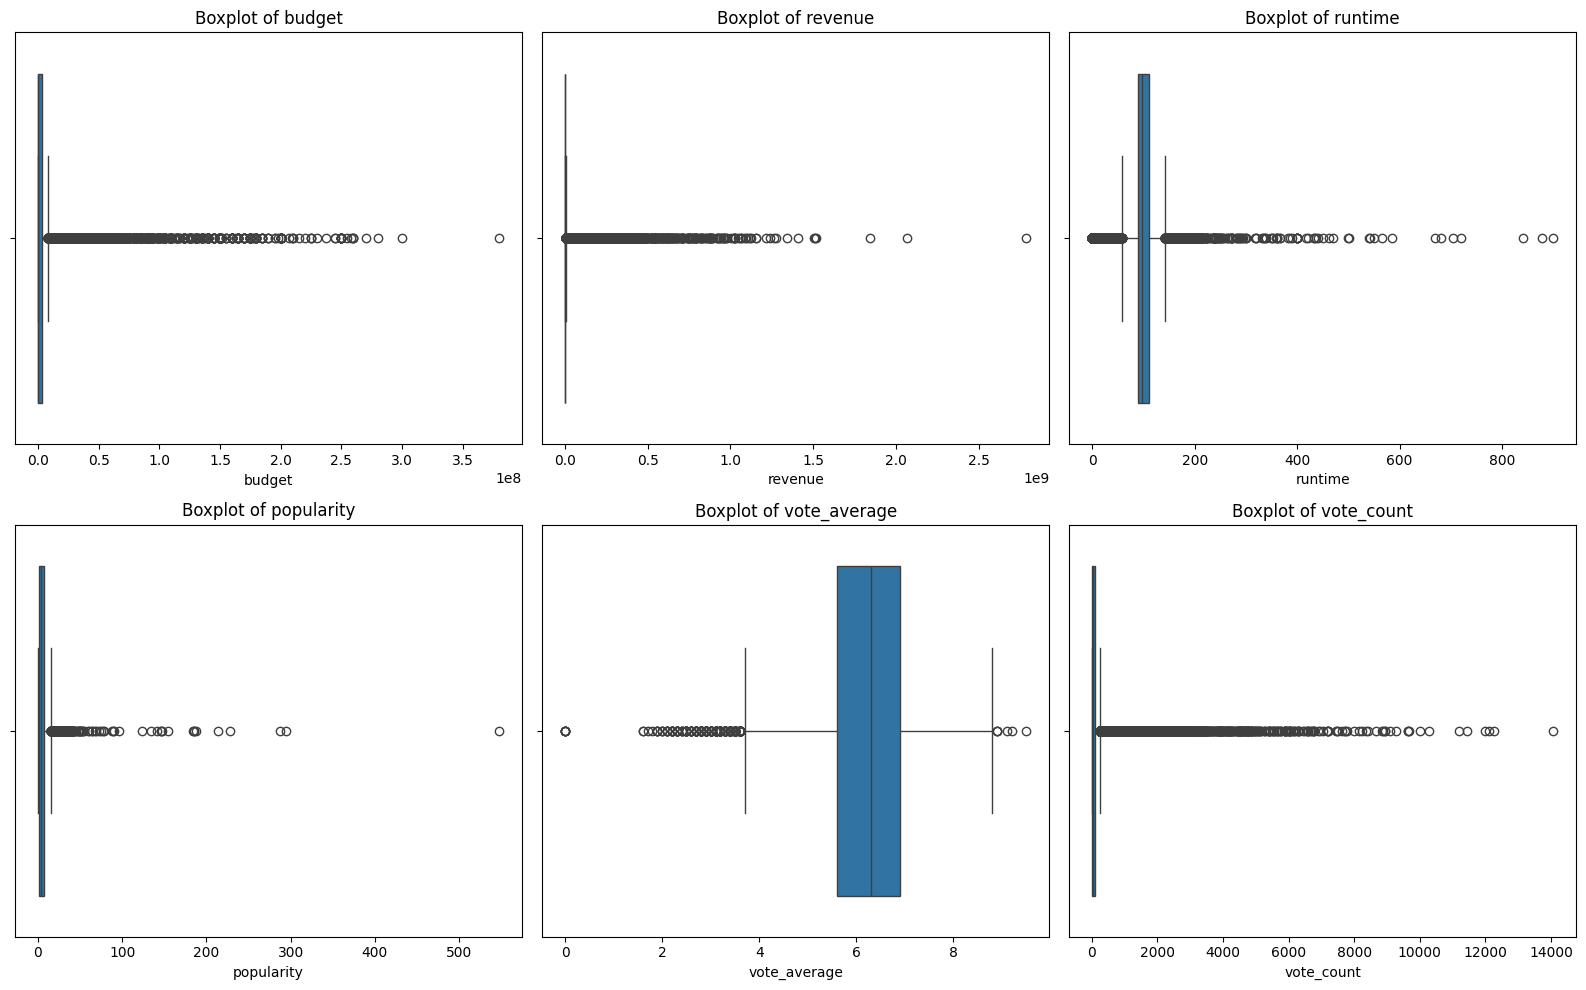

In [56]:
# Let's check for outliers in the numeric columns
numeric_cols = ['budget', 'revenue', 'runtime', 'popularity', 'vote_average', 'vote_count']

# Boxplot for outlier detection
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=movies[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()